In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os

## 7-qubit

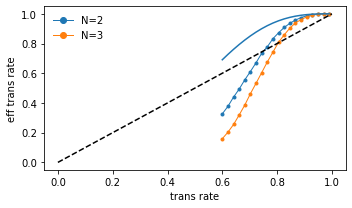

In [52]:
repeat = 24
Nl_list = np.arange(2,4)

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_7q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_avg /= Ntot
        plt.plot(1-p_list,succ_prob_avg,".-", color="C%d" % (i_L), linewidth=1,label="N=%d" % (Nl))

f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
plt.plot(1-p_list,f(1-p_list),"-")

x_list = np.linspace(0.,1)
plt.plot(x_list,x_list,"k--")
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## 48-qubit ldpc

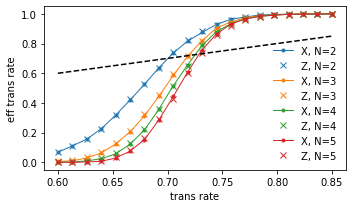

In [59]:
repeat = 24
Nl_list = np.arange(2,6)

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_48q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros(len(p_list))
                succ_prob_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        plt.plot(1-p_list,succ_prob_X_avg,".-", color="C%d" % (i_L), linewidth=1,label="X, N=%d" % (Nl))
        plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))

# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")

x_list = np.linspace(0.6,0.85)
plt.plot(x_list,x_list,"k--")
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()